# Opis metody Logit Lens

## Cel metody

Logit Lens jest techniką interpretacyjną stosowaną w badaniach nad dużymi modelami językowymi (LLM) typu Transformer, która umożliwia analizę przewidywań modelu na poziomie warstwowym. Jej głównym zadaniem jest zrozumienie, jakie informacje reprezentowane są w aktywacjach modelu na kolejnych etapach przetwarzania danych wejściowych, zanim dojdzie do końcowej predykcji.

Metoda opiera się na obserwacji, że każda warstwa sieci przekształca dane wejściowe, stopniowo wzbogacając je o cechy językowe i kontekstowe. Zamiast analizować wyłącznie ostatnią warstwę modelu, Logit Lens pozwala przekształcić aktywacje z dowolnej warstwy na przewidywania słów — przy użyciu macierzy wag wyjściowych modelu.

---

## Zasada działania

Dla dowolnej warstwy modelu typu Transformer:

1. Wyodrębniamy aktywacje ukryte (hidden states) dla konkretnego wejściowego ciągu tokenów.
2. Aktywacje te przekształcane są przy pomocy transponowanej macierzy wag wyjściowych (`W.T`) na logity słów.
3. Wynikowe logity poddaje się funkcji softmax, co daje rozkład prawdopodobieństwa dla słownika modelu.
4. Interpretacja obejmuje wybór najwyżej punktowanych tokenów, aby zobaczyć, jakie słowa byłyby przewidziane przez model już na tym etapie.

---
<span style="color:red">WSTAWIAMY TU JAKIŚ SCHEMACIK NARYSOWANY? CZY SŁOWNY OPIS WYSTARCZY?</span>

---

## Pseudokod

```python
for layer in range(total_layers):
    activations = get_activations(model, input_tokens, layer)
    logits = activations @ W.T  # Mapowanie do przestrzeni słów
    probabilities = softmax(logits)
    top_predictions = get_top_k(probabilities, k=5)
    print(f"Warstwa {layer}: {top_predictions}")
```

**Objaśnienia:**
- `get_activations` — funkcja zwracająca aktywacje z wybranej warstwy dla danego zestawu tokenów.
- `W.T` — transponowana macierz wag wyjściowych modelu, używana do odtworzenia logitów dla słów.
- `softmax` — normalizacja logitów do rozkładu prawdopodobieństwa.
- `get_top_k` — wybór `k` najwyżej ocenianych słów.

---

## Przykład praktyczny

Autor bloga przedstawia przykład użycia metody dla zdania:

> "We train GPT-3, an aut..."

Wczesne warstwy modelu mogą generować wysokie prawdopodobieństwo dla słów niepoprawnych, np. `oreceptor`, `ocratic`. W miarę przechodzenia przez kolejne warstwy, model stopniowo zawęża wybory, aż w końcu trafnie przewiduje słowo `oregressive`.

Typowy sposób wizualizacji wyników Logit Lens to wykres:
- Oś Y: numer warstwy sieci.
- Oś X: pozycja tokena w wejściu.
- Kolor komórki: intensywność logitów lub prawdopodobieństwa przewidywania.

Wizualizacja tego typu umożliwia wgląd w proces, w jaki sposób model "dochodzi" do ostatecznej predykcji słowa i jak zmienia swoje przewidywania w kolejnych warstwach.

Logit Lens jest wartościowym narzędziem w analizie modeli językowych, ponieważ pozwala:

- śledzić i rozumieć mechanizm formowania się predykcji w warstwach pośrednich,
- identyfikować błędy modelu oraz momenty, w których dochodzi do korekty przewidywań,
- analizować procesy uczenia i wzmacniania kontekstu w architekturze Transformer.

---
Szczegółowy opis metody oraz przykładowy kod, oraz wszystkie wizualizacje można znaleźć w artykule:
[Interpreting GPT: The Logit Lens](https://www.lesswrong.com/posts/AcKRB8wDpdaN6v6ru/interpreting-gpt-the-logit-lens)

### Wizualizacja dla wspomnianego przykładu:

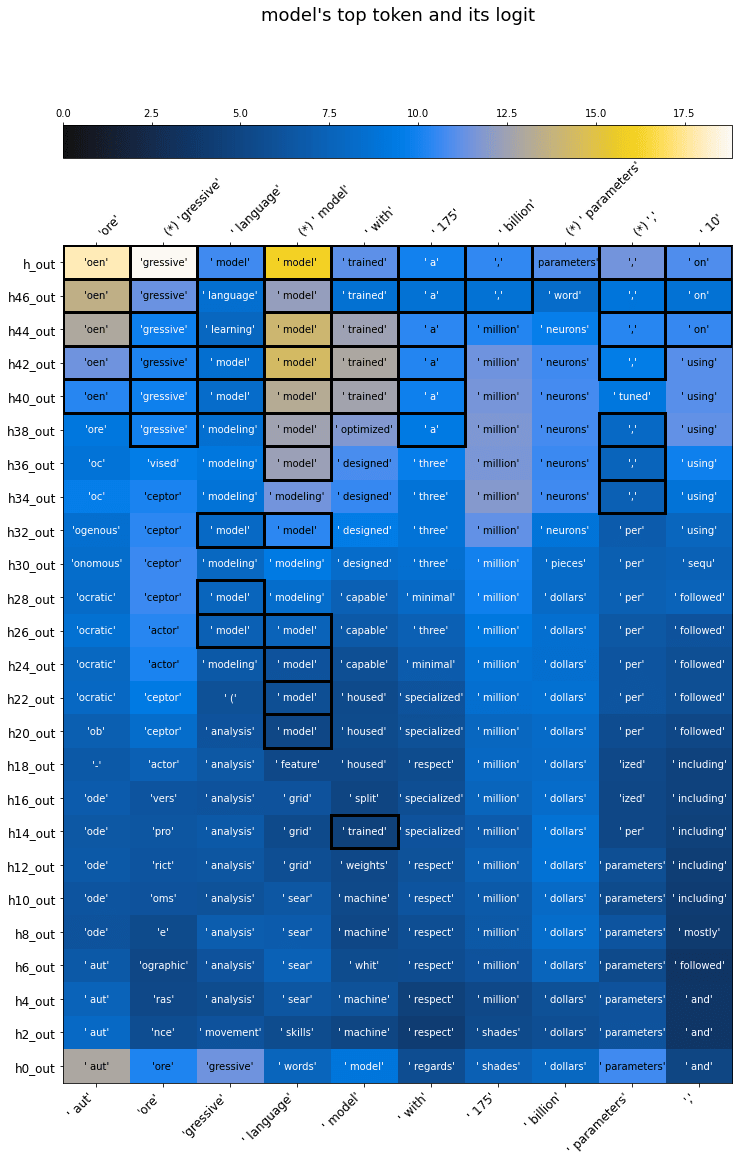